# PRAKTIKUM BIG DATA ANALYTICS - PERTEMUAN 12 (VISUALISASI: PANDA & PLOTLY)

### TUJUAN:
Mampu memahami dan memvisualisasikan hasil analisis data menggunakan Python

## PRAKTIK

### 1. Bukalah data iris.csv. Akan kita lakukan visualisasi untuk 2 variabel dari dataset iris.csv 

In [1]:
import pandas as pd
df = pd.read_csv('iris.csv')
print(df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


### 2. Ketikkan perintah di bawah ini (tuliskan dalam 1 cell):

Automatically created module for IPython interactive environment


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


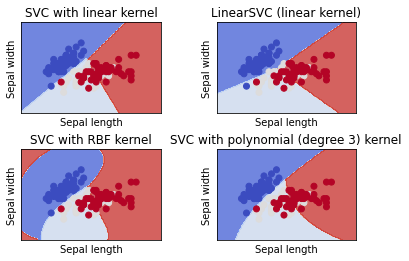

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02 # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',]

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

Baris-baris kode di atas merupakan perbandingan antara beberapa klasifikasi SVM linear pada proyeksi 2D dari dataset iris. Pada klasifikasi ini, kita hanya mengambil dua kolom saja yaitu Sepal length dan Sepal width. Kode di atas menunjukkan cara untuk melakukan plot pada decision surface untuk empat SVM Classifiers dengan kernel-kernel

Model linear `LinearSVC()` dan `SVC(kernel='linear')` menghasilkan decision boundaries yang sedikit berbeda. Berikut perbedaan-perbedaannya:
- LinearSVC meminimalkan kehilangan hinge loss (kuadrat) sementara SVC meminimalkan hinge loss biasa.
- LinearSVC menggunakan reduksi multikelas One-vs-All (juga dikenal sebagai One-vs-Rest) sementara SVC menggunakan reduksi multikelas One-vs-One.

Kedua model linier memiliki decision boundaries linier (_intersecting hyperplanes_) sedangkan model kernel non-linear (_polinomial atau Gaussian RBF_) memiliki decision boundaries non-linier yang lebih fleksibel dengan bentuk yang bergantung pada jenis kernel dan parameternya.

Untuk penulisan kode di atas, kita awali dengan mengimport beberapa libraries yang dibutuhkan seperti numpy, matplotlib.pyplot, dan sklearn yang sekaligus mengimport svm dan datasets. Lalu dilanjutkan dengan mengimport data dengan kode `iris = datasets.load_iris()` kemudian ambil dua kolom awal saja dengan `X = iris.data[:, :2]` dan buat kedua fitur itu menjadi target dengan `y = iris.target`. Selanjutnya kita tentukan step sebesar .02.

Tahap selanjutnya adalah dengan membuat instance SVM dan sekaligus menyesuaikan data. Di tahap ini, kita tidak menskalakan data karena kita akan memplot support vectors. Kita set dulu parameternya sebesar 1.0 kemudian kita set beberapa model svm seperti berikut:
- `svc = svm.SVC(kernel='linear', C=C).fit(X, y)`
- `rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)`
- `poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)`
- `lin_svc = svm.LinearSVC(C=C).fit(X, y)`

Selanjutnya kita buat mesh untuk proses plot dengan `x_min`, `x_max`, `y_min`, `y_max`. Jika sudah, lanjutkan dengan memebrikan judul pada setiap plot dengan variabel bernama "titles" kemudian tulis judulnya.

Klasifikasi dilanjutkan dengan membuat perulangan for untuk memasukkan nilai setiap model svm ke mesh yang tadi sudah dibuat. Di tahap ini, intinya adalah kita plot decision boundary. Untuk melakukan itu, kami tetapkan warna untuk masing-masing titik di mesh `[x_min, x_max]x[y_min, y_max]`. Kemudian kita aplikasikan prediksi klasifikasi SVM dengan baris kode `Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])`. Lalu kita masukkan hasil ke dalam plot warna dengan baris kode `Z = Z.reshape(xx.shape)` dan `plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)`. Terakhir, kita plot titik-titik training dengan X sebagai Sepal length dan Y sebagai Sepal width.

**_LATIHAN ada di file prakbda12_latihan.ipynb_**